# Reviewing rainfall levels by region for cyclone Chido

This notebook reviews how far from the rainfall trigger cyclone Chido was.

In [1]:
%load_ext jupyter_black
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from src.datasources import codab, imerg
from src.constants import *
from src import db_utils

In [3]:
adm1 = codab.load_codab(admin_level=1)

In [4]:
aoi_adm1_pcodes = adm1["ADM1_PCODE"].unique()
aoi_adm1_pcodes.shape

(11,)

In [5]:
# this is from Meteo-France site
landfall_df = pd.DataFrame(
    {
        "NAME": ["CHIDO"],
        "LON": [40.58],
        "LAT": [-13.37],
        "landfall_date": [pd.to_datetime("2024-12-15")],
    }
)
landfall_df

,NAME,LON,LAT,landfall_date
0,CHIDO,40.58,-13.37,2024-12-15


In [6]:
IMERG_START_DATE = pd.to_datetime("2000-06-01")
extra_days = 1
dfs = []
for sid, row in landfall_df.set_index("NAME").iterrows():
    landfall_date = row["landfall_date"]
    start_date = landfall_date - pd.Timedelta(days=extra_days)
    end_date = landfall_date + pd.Timedelta(days=extra_days)
    if end_date < IMERG_START_DATE:
        print(f"{row['NAME']} too early")
        continue
    df_in = imerg.fetch_imerg_data(aoi_adm1_pcodes, start_date, end_date)
    df_in["NAME"] = sid
    dfs.append(df_in)

In [7]:
end_date

Timestamp('2024-12-16 00:00:00')

In [8]:
imerg_df = pd.concat(dfs, ignore_index=True)
imerg_df

,iso3,pcode,valid_date,adm_level,mean,median,min,max,count,sum,std,NAME
0,MOZ,MZ01,2024-12-14,1,1.021741,0.090000,0.000,17.005000,2567,2622.8100,2.341697,CHIDO
1,MOZ,MZ01,2024-12-15,1,49.011295,43.585003,5.645,114.225006,2567,125811.9900,27.962984,CHIDO
2,MOZ,MZ01,2024-12-16,1,2.748847,1.735000,0.000,16.195000,2567,7056.2900,3.031267,CHIDO
3,MOZ,MZ02,2024-12-14,1,1.534365,0.282500,0.000,31.520000,2636,4044.5850,2.981364,CHIDO
4,MOZ,MZ02,2024-12-15,1,0.001396,0.000000,0.000,0.390000,2636,3.6800,0.017225,CHIDO
5,MOZ,MZ02,2024-12-16,1,0.273096,0.010000,0.000,3.770000,2636,719.8800,0.502934,CHIDO
6,MOZ,MZ03,2024-12-14,1,1.941789,0.030000,0.000,35.765000,2409,4677.7700,5.331214,CHIDO
7,MOZ,MZ03,2024-12-15,1,0.009419,0.000000,0.000,0.900000,2409,22.6900,0.066043,CHIDO
8,MOZ,MZ03,2024-12-16,1,0.301936,0.035000,0.000,5.104999,2409,727.3650,0.622436,CHIDO
9,MOZ,MZ04,2024-12-14,1,9.312240,6.030000,0.000,80.765010,2121,19751.2600,11.095520,CHIDO


In [9]:
adm_mean_sum = imerg_df.groupby("pcode")["mean"].sum().reset_index()
adm1_rain = adm1.merge(
    adm_mean_sum, left_on="ADM1_PCODE", right_on="pcode", how="left"
)

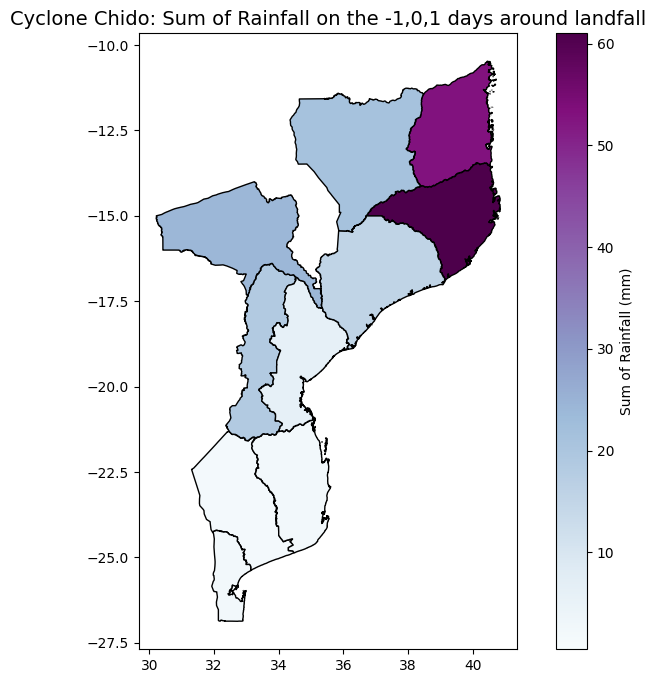

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

adm1_rain.plot(
    column="mean",
    cmap="BuPu",
    legend=True,
    legend_kwds={"label": "Sum of Rainfall (mm)"},
    edgecolor="black",
    ax=ax,
)
ax.set_title(
    "Cyclone Chido: Sum of Rainfall on the -1,0,1 days around landfall",
    fontsize=14,
)
plt.show()